# DOU Salary Regression
Predict the salaries of Project Managers in Lviv, using the salary dataset from DOU.ua.

In [147]:
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

In [148]:
%matplotlib inline

## Config

In [149]:
dataset_file_name = "2017_june_final.csv"
download_fresh_data = True

## Prepare Data

In [150]:
# Pulling fresh data from the Internet, if we want to.
if download_fresh_data:
    urlretrieve("https://github.com/imax/dou-salaries/raw/master/data/"
                + dataset_file_name, dataset_file_name)

In [151]:
# Loading the data into memory.
df = pd.read_csv(dataset_file_name)

In [152]:
# Filtering the data.
# Removing the extreme examples, and limiting our scope to one city and position.
df = df[(df["salary"] <= 10000) & 
        (df["exp"] < 10) & 
        (df["Город"] == "Киев") & 
        (df["Должность"] == "Senior QA engineer") &
        (df["Специализация"] == "Automation QA") &
        (df["Тип.компании"] == "Аутсорсинговая")]

## Train Linear Regression

In [153]:
X = df["exp"].values.reshape(-1, 1)
y = df["salary"].values.reshape(-1, 1)

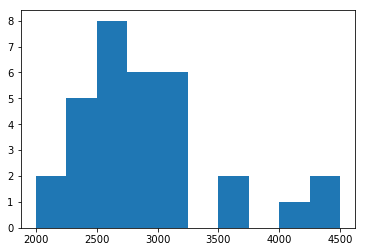

In [154]:
plt.hist(y)
plt.show()

In [155]:
# any percentile between 0 and 100 can be computed for any collection of values
# and it is always an element of the collection, used np.percentile function
# it automatically sort passed collection to it
print(f'25% percentile: {np.percentile(y, 25)}')
print(f'50% percentile: {np.percentile(y, 50)}')
print(f'75% percentile: {np.percentile(y, 75)}')

25% percentile: 2575.0
50% percentile: 2850.0
75% percentile: 3000.0


In [156]:
dataset_file_name = "2016_may_final.csv"
download_fresh_data = True

In [157]:
# Pulling fresh data from the Internet, if we want to.
if download_fresh_data:
    urlretrieve("https://github.com/imax/dou-salaries/raw/master/data/"
                + dataset_file_name, dataset_file_name)

In [158]:
# Loading the data into memory.
df = pd.read_csv(dataset_file_name)

In [159]:
# Filtering the data.
# Removing the extreme examples, and limiting our scope to one city and position.
df = df[(df["salary"] <= 10000) & 
        (df["exp"] < 10) & 
        (df["Город"] == "Киев") & 
        (df["Должность"] == "Senior QA engineer") &
        (df["Специализация"] == "Automation QA") &
        (df["Тип.компании"] == "Аутсорсинговая")]

In [160]:
X = df["exp"].values.reshape(-1, 1)
y = df["salary"].values.reshape(-1, 1)

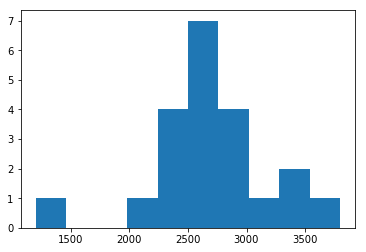

In [161]:
plt.hist(y)
plt.show()

In [162]:
print(f'25% percentile: {np.percentile(y, 25)}')
print(f'50% percentile: {np.percentile(y, 50)}')
print(f'75% percentile: {np.percentile(y, 75)}')

25% percentile: 2450.0
50% percentile: 2565.0
75% percentile: 2900.0


In [163]:
# Looks like salary of Senior Automation QA engineer that works in Kyiv's "galera" changed a lot
# we can observe a big salary bump within May 2016 to June 2018 (please observe histograms above), e.g.
# difference between percentiles:
### 25% percentile: 2575 (year 2017) - 2450 (year 2016) = + 125 $
### 50% percentile: 2850 (year 2017) - 2565 (year 2016) = + 285 $
### 75% percentile: 3000 (year 2017) - 2900 (year 2016) = + 100 $
# so average salary observably increased.

In [164]:
# use old May 2016 data to train model
salary_regression = linear_model.LinearRegression()
salary_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plot & Predict New Examples

In [165]:
# Using the trained model to predict salaries for previously unseen data.
# (2.0, 3.5, 4.5 years of experience).
print("New examples:")
X_new_examples = np.array([2.0, 3.5, 4.5]).reshape(-1, 1)
y_new_examples = salary_regression.predict(X_new_examples)
print('\n'.join([
    "{0} yrs. -> ${1:.0f}".format(exp[0], sal[0])
    for exp, sal in zip(X_new_examples, y_new_examples)
]))

New examples:
2.0 yrs. -> $2581
3.5 yrs. -> $2640
4.5 yrs. -> $2679


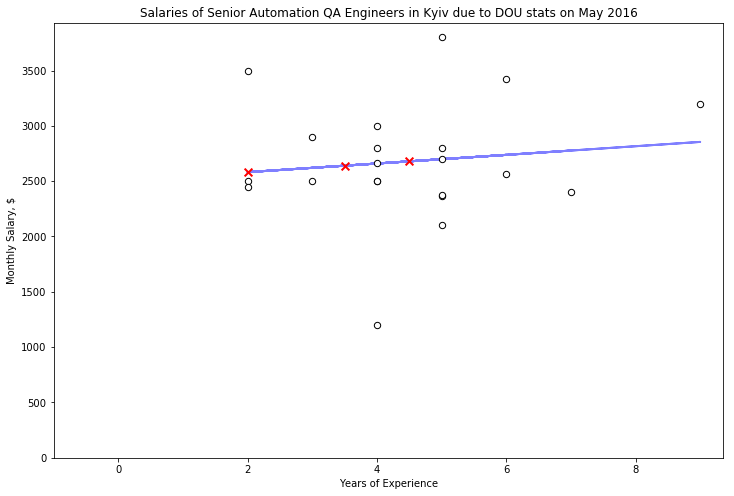

In [166]:
# Plotting the data and the regression line.
plt.figure(facecolor="white", figsize=(12, 8))
plt.scatter(
    x=df["exp"],
    y=df["salary"],
    color="black",
    facecolor="white",
    marker="o",
    s=40,
    zorder=2
)
plt.plot(
    X,
    salary_regression.predict(X),
    color="blue",
    alpha=0.5,
    linewidth=2,
    zorder=1
)

# Add newly predicted values to the plot.
plt.scatter(
    x=X_new_examples,
    y=y_new_examples,
    facecolor="red",
    marker="x",
    s=60,
    linewidth=2,
    zorder=2
)

plt.xlim(xmin=-1)
plt.ylim(ymin=0)
plt.xlabel("Years of Experience")
plt.ylabel("Monthly Salary, $")
plt.title("Salaries of Senior Automation QA Engineers in Kyiv due to DOU stats on May 2016")
plt.show()

In [167]:
# use new June 2017 data to train model
dataset_file_name = "2017_june_final.csv"
urlretrieve("https://github.com/imax/dou-salaries/raw/master/data/"
            + dataset_file_name, dataset_file_name)

('2017_june_final.csv', <http.client.HTTPMessage at 0x12101c518>)

In [168]:
# Loading the data into memory.
df = pd.read_csv(dataset_file_name)

In [169]:
# Filtering the data.
# Removing the extreme examples, and limiting our scope to one city and position.
df = df[(df["salary"] <= 10000) & 
        (df["exp"] < 10) & 
        (df["Город"] == "Киев") & 
        (df["Должность"] == "Senior QA engineer") &
        (df["Специализация"] == "Automation QA") &
        (df["Тип.компании"] == "Аутсорсинговая")]

In [170]:
X = df["exp"].values.reshape(-1, 1)
y = df["salary"].values.reshape(-1, 1)

salary_regression = linear_model.LinearRegression()
salary_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
# Using the trained model to predict salaries for previously unseen data.
# (2.0, 3.5, 4.5 years of experience).
print("New examples:")
X_new_examples = np.array([2.0, 3.5, 4.5]).reshape(-1, 1)
y_new_examples = salary_regression.predict(X_new_examples)
print('\n'.join([
    "{0} yrs. -> ${1:.0f}".format(exp[0], sal[0])
    for exp, sal in zip(X_new_examples, y_new_examples)
]))

New examples:
2.0 yrs. -> $2351
3.5 yrs. -> $2642
4.5 yrs. -> $2837


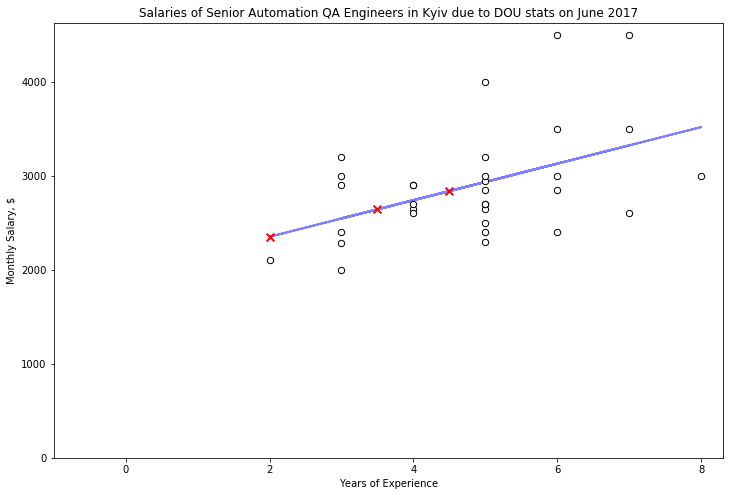

In [172]:
# Plotting the data and the regression line.
plt.figure(facecolor="white", figsize=(12, 8))
plt.scatter(
    x=df["exp"],
    y=df["salary"],
    color="black",
    facecolor="white",
    marker="o",
    s=40,
    zorder=2
)
plt.plot(
    X,
    salary_regression.predict(X),
    color="blue",
    alpha=0.5,
    linewidth=2,
    zorder=1
)

# Add newly predicted values to the plot.
plt.scatter(
    x=X_new_examples,
    y=y_new_examples,
    facecolor="red",
    marker="x",
    s=60,
    linewidth=2,
    zorder=2
)

plt.xlim(xmin=-1)
plt.ylim(ymin=0)
plt.xlabel("Years of Experience")
plt.ylabel("Monthly Salary, $")
plt.title("Salaries of Senior Automation QA Engineers in Kyiv due to DOU stats on June 2017")
plt.show()